In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
#import mpld3
#mpld3.enable_notebook()

from scipy import optimize

import sys
sys.path.append('../python/')
from EdwRes import *

In [2]:
# import data from Edelweiss
res_data = pd.read_csv("edelweiss_NRwidth_GGA3_data.txt", skiprows=1, \
                       names=['E_recoil', 'sig_NR', 'E_recoil_err', 'sig_NR_err'], \
                       delim_whitespace=True)
print (res_data.head(10))
E_recoil = res_data["E_recoil"]
sig_NR = res_data["sig_NR"]
sig_NR_err = res_data['sig_NR_err']

   E_recoil    sig_NR  E_recoil_err  sig_NR_err
0   16.1946  0.062345      0.946176    0.001157
1   16.4428  0.062345      0.945278    0.001157
2   44.2627  0.046528      0.992477    0.001543
3   24.5012  0.059397      0.992477    0.001185
4   97.7172  0.044847      1.033260    0.002783
5   58.4014  0.050082      0.991830    0.002288
6   34.2156  0.053417      1.033260    0.001102


Text(0,0.5,'1-sigma width of NR band')

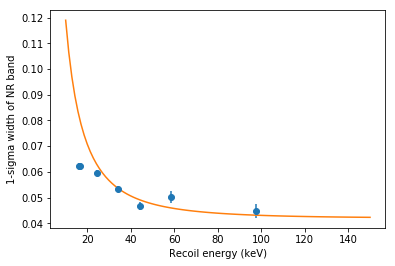

In [3]:
ion_center_0keV = 1.3
ion_guard_0keV = 1.5
heat_0keV = 0.4
ion_122keV = 3.1 #3.3 #3.1
heat_122keV = 2.7
aH = 0.0157
V = 4

# get_sig_nuc_func_fit(FWHM_center, FWHM_guard, FWHM122_ion, FWHM0_heat, FWHM122_heat, V, aH=None, C = None)
#sig_nr_GGA3 = get_sig_nuc_func(ion_center_0keV, ion_guard_0keV, ion_122keV, heat_0keV, heat_122keV, V, aH)
sig_nr_func = get_sig_nuc_func(ion_center_0keV, ion_guard_0keV, ion_122keV, heat_0keV, heat_122keV, V, aH, C=0.04)

plt.errorbar(E_recoil, sig_NR, yerr=sig_NR_err, fmt="o")

E_recoil_arr = np.linspace(10, 150, 100)
plt.plot(E_recoil_arr, sig_nr_func(E_recoil_arr))

plt.xlabel("Recoil energy (keV)")
plt.ylabel("1-sigma width of NR band")
#plt.ylim(0, 0.1)

In [4]:
def fit_func(E_keV_arr, par0):
    fit_func = get_sig_nuc_func(ion_center_0keV, ion_guard_0keV, ion_122keV, heat_0keV, heat_122keV, V, aH, par0)
    
    return fit_func(E_keV_arr)

In [5]:
params, params_cov = optimize.curve_fit(fit_func, E_recoil[2::], sig_NR[2::], sigma=sig_NR_err[2::], p0=[0.04])
#params, params_cov = optimize.curve_fit(fit_func, E_recoil, sig_NR, sigma=sig_NR_err, p0=[0.04])
perr = np.sqrt(np.diag(params_cov))

In [6]:
print(params, params_cov, perr)

[0.03883917] [[2.38985068e-06]] [0.00154591]


In [7]:
perr/params

array([0.03980297])